# **Proyecto de Programación para Analítica Descriptiva y Predictiva**
## Nombre del Proyecto: [Diagnostico de desordenes de sueno]
## Grupo: [B]
## Autor: [Antonio Calzadilla Miranda]
## Matrícula: [263861]
## Fecha: [09/09/2025]

1. Introducción
- Descripción del problema:

Los desordenes de sueno juegan un papel muy importante en la salud de las personas ya que pueden estar vinculados a ciertas enfermedades cronicas como hipertension, infartos, arritmias, obesidad, diabetes, mayor vulnerabilidad a infecciones ademas de que se asocian con problemas de depresion, estres cronico, deterioro cognitivo, entre otras padecimientos.

Evaluar y clasificar si una persona puede tener algun tipo de desorder tomando como referencia las variables independientes, puede ser una herramienta muy util para identificar factores de riesgo ya que permite construir modelos de AI aplicados a salud preventiva.

- Objetivo del análisis:

Identificar factores de riesgo que pueden impactar en desordenes de sueno, aplicando tecnicas y modelos de AI.

- Fuente de datos:

https://www.kaggle.com/datasets/mdsultanulislamovi/sleep-disorder-diagnosis-dataset?select=Sleep_health_and_lifestyle_dataset.csv

# **2. Captura y Carga de Datos**

##¿Qué formato tienen los datos (CSV)?, ¿Cuántas observaciones y variables contiene el dataset? 13 variables y 374 observaciones

## - Explicación sobre problemas en la carga de Datos y el Código para la carga de datos desde archivos (El archivo se cargo en Drive.google.com y desde esa pagina web se abrio en Colab, donde a traves del comando from google.colab import drive drive.mount('/content/drive') se pudo cargar el archivo y usando la libreria Pandas se pudo analizar, identificar datos nulos, conocer las caracteristicas del dataset, revisar las columnas que no aportaban informacion util. Ademas se utilizaron las librerias Plotly, matplotlib y seaborn para generar graficos.

Conexion de Google Drive a
Google Colab

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
  #Importamos la librería de pandas y asignamos un alias (pd)
  import pandas as pd

  # Leemos el archivo que contiene comas
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Programacion /Semana 06 Proyecto SUENO/Sleep_health_and_lifestyle_dataset.csv")
  #imprimimos el nombre de las columnas
  print(df.columns)

  #Convertimos los nombres de las columnas a minúsculas
  df.columns = df.columns.str.lower()

  #imprimimos el nombre de las columnas
  print(df.columns)

#imprimimos el nombre de las columnas
print(df.head())

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')
Index(['person id', 'gender', 'age', 'occupation', 'sleep duration',
       'quality of sleep', 'physical activity level', 'stress level',
       'bmi category', 'blood pressure', 'heart rate', 'daily steps',
       'sleep disorder'],
      dtype='object')
   person id gender  age            occupation  sleep duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   quality of sleep  physical activity level  stress level bmi category  \
0             

Traducir titulos y agregar guion bajo entre las palabras

In [102]:
# Normalizar todas las columnas: quitar espacios y pasar a minúsculas
df.columns = [col.strip().lower() for col in df.columns]

# Diccionario de traducción con nombres ya en minúscula
traducciones = {
    "person id": "id_persona",
    "gender": "genero",
    "age": "edad",
    "occupation": "ocupacion",
    "sleep duration": "duracion_sueno",
    "quality of sleep": "calidad_sueno",
    "physical activity level": "nivel_actividad_fisica",
    "stress level": "nivel_estres",
    "bmi category": "indice_imc",
    "blood pressure": "presion_arterial",
    "heart rate": "frecuencia_cardiaca",
    "daily steps": "pasos_diarios",
    "sleep disorder": "desorden_sueno"
}

df.rename(columns=traducciones, inplace=True)

print(df.columns.tolist())

['id_persona', 'genero', 'edad', 'ocupacion', 'duracion_sueno', 'calidad_sueno', 'nivel_actividad_fisica', 'nivel_estres', 'indice_imc', 'presion_arterial', 'frecuencia_cardiaca', 'pasos_diarios', 'desorden_sueno']


#**3.Transformación y Preprocesamiento - Data Wrangling**



In [103]:
print(df.dtypes)

id_persona                  int64
genero                     object
edad                        int64
ocupacion                  object
duracion_sueno            float64
calidad_sueno               int64
nivel_actividad_fisica      int64
nivel_estres                int64
indice_imc                 object
presion_arterial           object
frecuencia_cardiaca         int64
pasos_diarios               int64
desorden_sueno             object
dtype: object


Dado que la variable presion_arterial de tipo object o category no aporta informacion numerica al estudio pero si cuenta con dos elementos importantes se decidio hacer un split en dos variables nuevas "sistolica" y "diastolica" considerando que estas dos variables son numericas lo cual permite identificar relaciones con otras variables y encontrar tendencias, por lo cual la variable presion_arterial fue eliminada.

La variable "id_persona" se elimino del dataset ya que se considera que no aporta informacion util, al ser solamente un identificador.

In [104]:
# Splitting blood pressure into systolic and diastolic
df[['sistolica', 'diastolica']] = df['presion_arterial'].str.split('/', expand=True)
df['sistolica'] = df['sistolica'].astype(int)
df['diastolica'] = df['diastolica'].astype(int)

Se analizaron valores unicos de algunas variables para conocer los rangos e identificar opciones. En el caso de la variable objetivo desorden_sueno se observo que se tienen tres posibles opciones: NaN, Sleep Apnea e Insomnia.

In [105]:
# Obtener valores unicos en la columna nivel_estres
unique_nivel_estres = df['nivel_estres'].unique()

# Imprimir los valores unicos
print("Posibles valores de 'nivel_estres':")
print(unique_nivel_estres)

Posibles valores de 'nivel_estres':
[6 8 7 4 3 5]


In [106]:
# Obtener valores unicos en la columna desorden_sueno
unique_desorden_sueno = df['desorden_sueno'].unique()

# Print the unique values
print("Posibles valores de 'desorden_sueno':")
print(unique_desorden_sueno)

Posibles valores de 'desorden_sueno':
[nan 'Sleep Apnea' 'Insomnia']


In [107]:
# Convertir adoption_rate a float
df['genero'] = df['genero'].astype('category')

# Convertir country a tipo categórico
df['ocupacion'] = df['ocupacion'].astype('category')

# Convertir company size a tipo categórico
df['nivel_estres'] = df['nivel_estres'].astype('int')

# Convertir age group a tipo categórico
df['indice_imc'] = df['indice_imc'].astype('category')

# Convertir year a tipo categórico
df['desorden_sueno'] = df['desorden_sueno'].astype('category')

Despues de realizarse la transformacion, asi fue como quedaron los datos a analizarse:

In [108]:
print(df.dtypes)
print(df.head())

id_persona                   int64
genero                    category
edad                         int64
ocupacion                 category
duracion_sueno             float64
calidad_sueno                int64
nivel_actividad_fisica       int64
nivel_estres                 int64
indice_imc                category
presion_arterial            object
frecuencia_cardiaca          int64
pasos_diarios                int64
desorden_sueno            category
sistolica                    int64
diastolica                   int64
dtype: object
   id_persona genero  edad             ocupacion  duracion_sueno  \
0           1   Male    27     Software Engineer             6.1   
1           2   Male    28                Doctor             6.2   
2           3   Male    28                Doctor             6.2   
3           4   Male    28  Sales Representative             5.9   
4           5   Male    28  Sales Representative             5.9   

   calidad_sueno  nivel_actividad_fisica  nivel_estr

In [109]:
df.drop('id_persona', axis=1, inplace=True)
df.drop('presion_arterial', axis=1, inplace=True)

## - Identificación de Tipos de Datos

Es posible observar que la unica columna con datos nulos es la variable target "Sleep Disorder".

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   genero                  374 non-null    category
 1   edad                    374 non-null    int64   
 2   ocupacion               374 non-null    category
 3   duracion_sueno          374 non-null    float64 
 4   calidad_sueno           374 non-null    int64   
 5   nivel_actividad_fisica  374 non-null    int64   
 6   nivel_estres            374 non-null    int64   
 7   indice_imc              374 non-null    category
 8   frecuencia_cardiaca     374 non-null    int64   
 9   pasos_diarios           374 non-null    int64   
 10  desorden_sueno          155 non-null    category
 11  sistolica               374 non-null    int64   
 12  diastolica              374 non-null    int64   
dtypes: category(4), float64(1), int64(8)
memory usage: 28.7 KB


Estadistica descriptiva de los datos:

In [111]:
df.describe()

,edad,duracion_sueno,calidad_sueno,nivel_actividad_fisica,nivel_estres,frecuencia_cardiaca,pasos_diarios,sistolica,diastolica
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [112]:
dimensiones = df.shape
num_filas = df.shape[0]
num_columnas = df.shape[1]
print("Dimensiones:", dimensiones)
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Dimensiones: (374, 13)
Número de filas: 374
Número de columnas: 13


A fin de identificar correlacion entre las variables se realizo una matriz de correlacion entre todas variables numericas.

                            edad  duracion_sueno  calidad_sueno  \
edad                    1.000000        0.344709       0.473734   
duracion_sueno          0.344709        1.000000       0.883213   
calidad_sueno           0.473734        0.883213       1.000000   
nivel_actividad_fisica  0.178993        0.212360       0.192896   
nivel_estres           -0.422344       -0.811023      -0.898752   
frecuencia_cardiaca    -0.225606       -0.516455      -0.659865   
pasos_diarios           0.057973       -0.039533       0.016791   
sistolica               0.605878       -0.180406      -0.121632   
diastolica              0.593839       -0.166570      -0.110151   

                        nivel_actividad_fisica  nivel_estres  \
edad                                  0.178993     -0.422344   
duracion_sueno                        0.212360     -0.811023   
calidad_sueno                         0.192896     -0.898752   
nivel_actividad_fisica                1.000000     -0.034134   
nivel_est

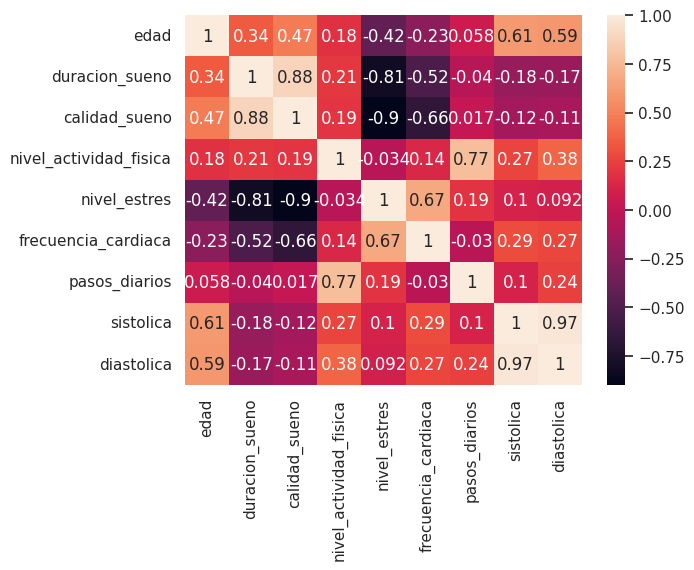

In [113]:
# Matriz de correlación
numeric_df = df[["edad", "duracion_sueno", "calidad_sueno", "nivel_actividad_fisica", "nivel_estres", "frecuencia_cardiaca", "pasos_diarios", "sistolica", "diastolica"]]
corr_matrix = numeric_df.corr()

print(corr_matrix)
plot = sns.heatmap(corr_matrix, annot=True)

El plot de correlacion muestra una alta correlacion entre las siguientes variables:

calidad_sueno - duracion_sueno

calidad_sueno - nivel_estres

nivel_actividad_fisica - pasos_diarios

sistolica - diastolica

In [114]:
# Se agruparon los valores por la variable 'desorden_sueno' y se obtuvo la estadistica descriptiva
estadistica_descriptiva_desorden_sueno = df.groupby('desorden_sueno')[numeric_df.columns].describe()

# Muestra la estadistica descriptiva de desorden_sueno analizando Insomnia y Sleep Apnea
print(estadistica_descriptiva_desorden_sueno)

                edad                                                      \
               count       mean       std   min   25%   50%    75%   max   
desorden_sueno                                                             
Insomnia        77.0  43.519481  4.808464  28.0  43.0  44.0  45.00  53.0   
Sleep Apnea     78.0  49.705128  8.990773  28.0  49.0  50.0  57.75  59.0   

               duracion_sueno                                               \
                        count      mean       std  min  25%  50%  75%  max   
desorden_sueno                                                               
Insomnia                 77.0  6.589610  0.387157  5.9  6.4  6.5  6.6  8.3   
Sleep Apnea              78.0  7.032051  0.974812  5.8  6.1  6.8  8.1  8.2   

               calidad_sueno                                               \
                       count      mean       std  min  25%  50%  75%  max   
desorden_sueno                                                            

/tmp/ipython-input-106514683.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



El siguiente paso fue crear unas tablas de contingencia a fin de identificar tendencias de desorden_sueno con el resto de los datos

In [115]:
import pandas as pd
#from scipy.stats import chi2_contingency

# Crear una tabla contingencia entre desorden_sueno y genero
contingency_table_genero = pd.crosstab(df['desorden_sueno'], df['genero'])

# Display the contingency table
print("Contingency Table: desorden_sueno vs. Genero")
print(contingency_table_genero)


Contingency Table: desorden_sueno vs. Genero
genero          Female  Male
desorden_sueno              
Insomnia            36    41
Sleep Apnea         67    11


In [116]:
# Crear una tabla contingencia entre desorden_sueno y nivel_estres
contingency_table_nivel_estres = pd.crosstab(df['desorden_sueno'], df['nivel_estres'])

# Display the contingency table
print("Contingency Table: desorden_sueno vs. nivel_estres")
print(contingency_table_nivel_estres)

Contingency Table: desorden_sueno vs. nivel_estres
nivel_estres     3   4  5  6   7   8
desorden_sueno                      
Insomnia         1  24  6  2  41   3
Sleep Apnea     30   3  4  1   6  34


In [118]:
# Crear una tabla contingencia entre desorden_sueno y calidad_sueno
contingency_table_calidad_sueno  = pd.crosstab(df['desorden_sueno'], df['calidad_sueno'])

# Display the contingency table
print("Contingency Table: desorden_sueno vs. calidad_sueno")
print(contingency_table_calidad_sueno)

Contingency Table: desorden_sueno vs. calidad_sueno
calidad_sueno   4  5   6   7  8   9
desorden_sueno                     
Insomnia        1  4  32  34  5   1
Sleep Apnea     4  3  33   3  3  32


In [119]:
# Crear una tabla contingencia entre desorden_sueno y ocupacion
contingency_table_ocupacion  = pd.crosstab(df['desorden_sueno'], df['ocupacion'])

# Display the contingency table
print("Contingency Table: desorden_sueno vs. ocupacion")
print(contingency_table_ocupacion)

Contingency Table: desorden_sueno vs. ocupacion
ocupacion       Accountant  Doctor  Engineer  Lawyer  Nurse  \
desorden_sueno                                                
Insomnia                 7       3         5       2      3   
Sleep Apnea              0       4         1       3     61   

ocupacion       Sales Representative  Salesperson  Scientist  \
desorden_sueno                                                 
Insomnia                           0           29          0   
Sleep Apnea                        2            1          2   

ocupacion       Software Engineer  Teacher  
desorden_sueno                              
Insomnia                        1       27  
Sleep Apnea                     0        4  


# **5. Análisis Exploratorio de los Datos**

## - Preguntas a responder

- Existe alguna relacion entre la variable dependiente desorden_sueno y el resto de las variables?

Si, se observo en las matrices de correlacion y en las tablas de contingencia que las personas saludables tendian a mostrar ciertas tendencias en la presencia de desorden_sueno, por ejemplo las enfermeras tienden a tener una alta probabilidad de padecer sleep apnea en tanto que los agentes de ventas y los maestros tienden a tener un alto porcentaje de paceder insomnia.

- Cuales son las variables que tienen una alta correlacion entre ellas?

calidad_sueno - duracion_sueno

calidad_sueno - nivel_estres

nivel_actividad_fisica - pasos_diarios

sistolica - diastolica


## - Estadísticas Empleadas, visualización y Resumen de las respuestas encontradas.

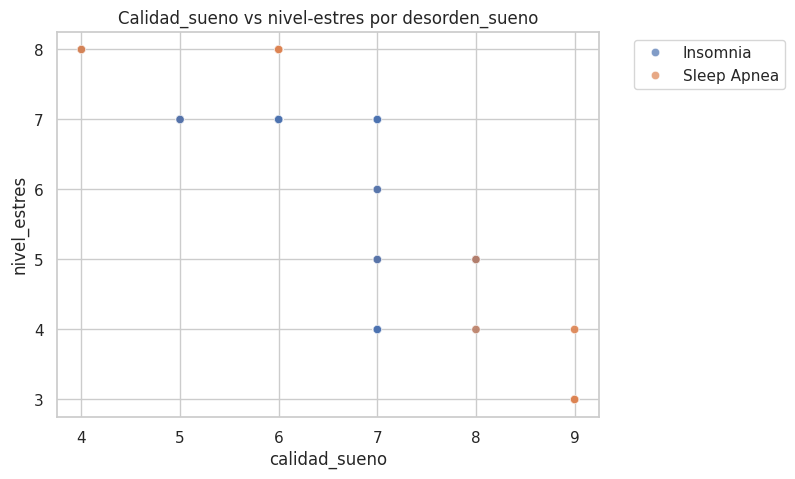

In [120]:
# Scatter plot que muestra la relacion entre adoption_rate y daily_active_users
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="calidad_sueno", y="nivel_estres", hue="desorden_sueno", alpha=0.7)
plt.title("Calidad_sueno vs nivel-estres por desorden_sueno")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Esta grafica permite observar como la insomnia se presenta principalmente cuando se tienen altos/medianos niveles de estres y altos/mediana calidad de sueno, mientras que el sleep apnea se presenta cuando se tienen altos niveles de estres y alto nivel de calidad de sueno.

/tmp/ipython-input-2705541127.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




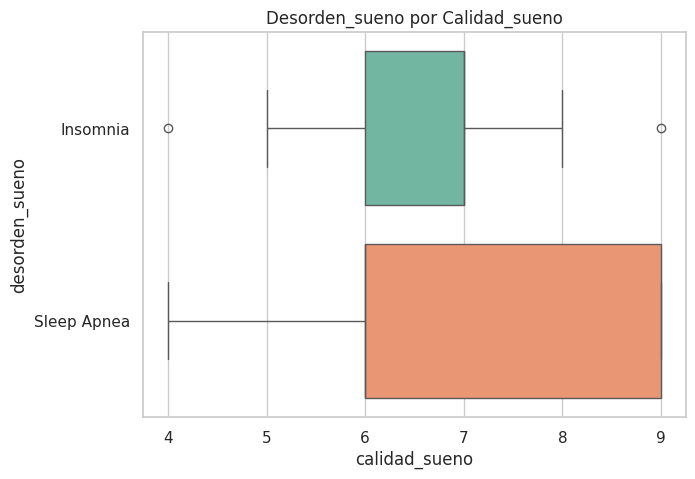

In [121]:
# Boxplot que muestra la Distribución de desorden_sueno por calidad_sueno
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="calidad_sueno", y="desorden_sueno", palette="Set2")
plt.title("Desorden_sueno por Calidad_sueno")
plt.show()

/tmp/ipython-input-369592648.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




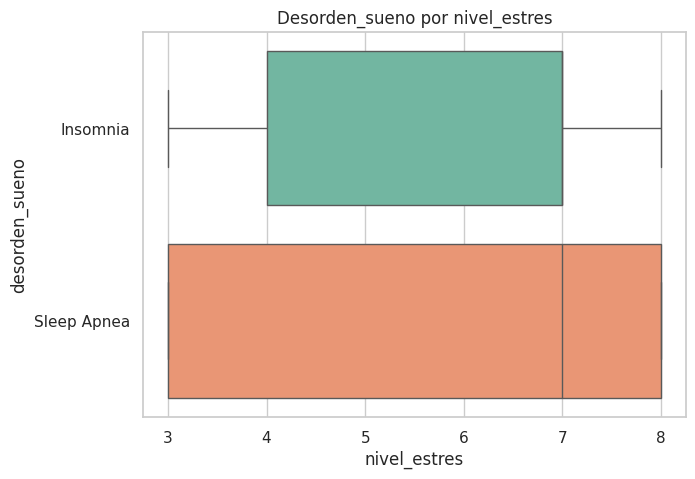

In [122]:
# Boxplot que muestra la Distribución de desorden_sueno por nivel_estres
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="nivel_estres", y="desorden_sueno", palette="Set2")
plt.title("Desorden_sueno por nivel_estres")
plt.show()

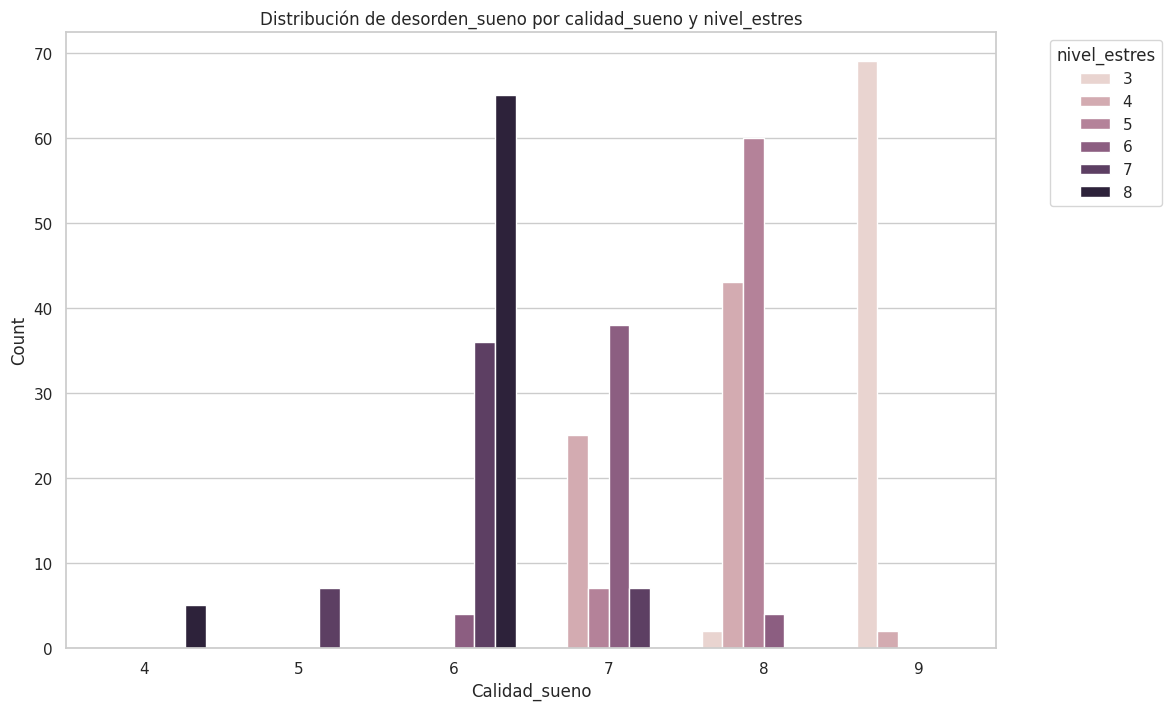

In [123]:
# Crear un plot agrupado que muestra la distribucion de desorden_sueno por calidad_sueno y nivel_estres
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="calidad_sueno", hue="nivel_estres", y=None) # Remove y
plt.title("Distribución de desorden_sueno por calidad_sueno y nivel_estres")
plt.xlabel("Calidad_sueno")
plt.ylabel("Count")
plt.legend(title='nivel_estres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Este plot permite observar que las personas entre menor nivel de estres tienen se refleja en una mayor calidad de sueno.

# Identificar si el dataset esta desbalanceado

In [124]:
# Conteo absoluto incluyendo NaN
print(df["desorden_sueno"].value_counts(dropna=False))

# Conteo porcentual incluyendo NaN
print(df["desorden_sueno"].value_counts(dropna=False, normalize=True) * 100)

desorden_sueno
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64
desorden_sueno
NaN            58.556150
Sleep Apnea    20.855615
Insomnia       20.588235
Name: proportion, dtype: float64


Dado que en la variable target "desorden_sueno" el 98% de los datos son NaN se puede considerar que el dataset esta desbalanceado. Por lo cual seria conveniente analizar las siguientes opciones:

- Trabajar unicamente con los registros que si tienen una opcion valida en la variable desorden_sueno aunque el tamano de la muestra sea mas pequeno.

- Trabajar con todos los datos y considerar los NaN como una clase adicional, lo cual generaria que se tuvierna tres posibles clases: NaN, Sleep Apnea o Insomnia. Aunque el modelo podria predecir NaN en futuras analisis.

- Entrenar con el 42% de los datos y luego dejar que el modelo autoetiquete los NaN con aprendizaje no supervisado

>>> Conteo absoluto:
desorden_sueno
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

>>> Conteo porcentual:
desorden_sueno
NaN            58.556150
Sleep Apnea    20.855615
Insomnia       20.588235
Name: proportion, dtype: float64

>>> Porcentaje de NaN en desorden_sueno: 58.56%


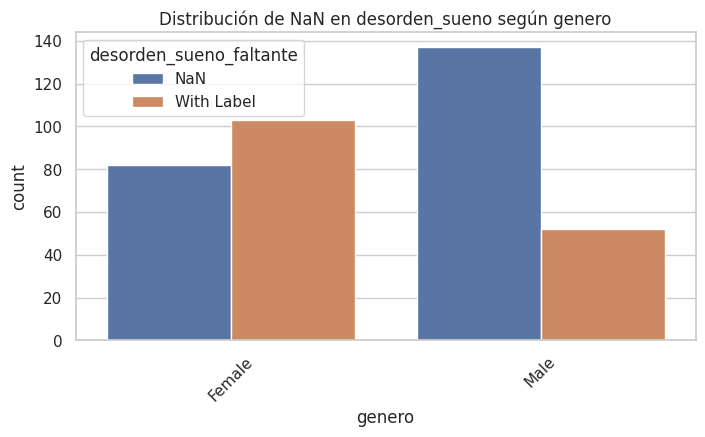

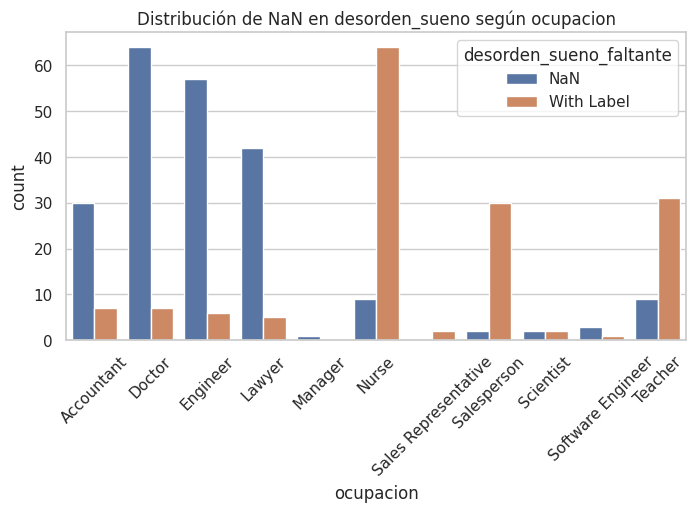

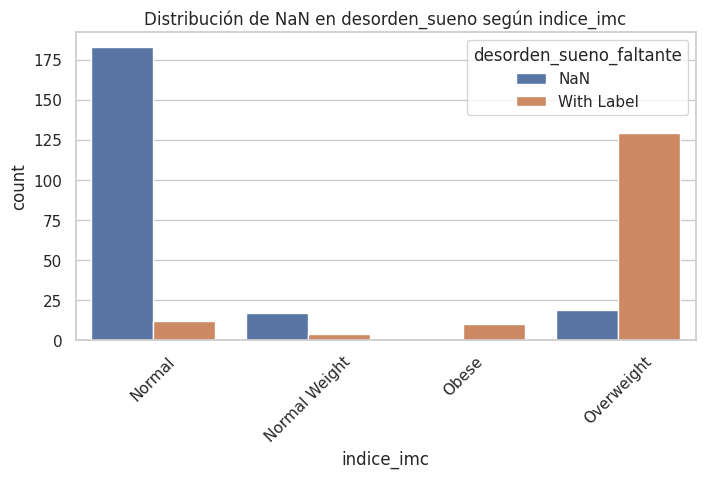

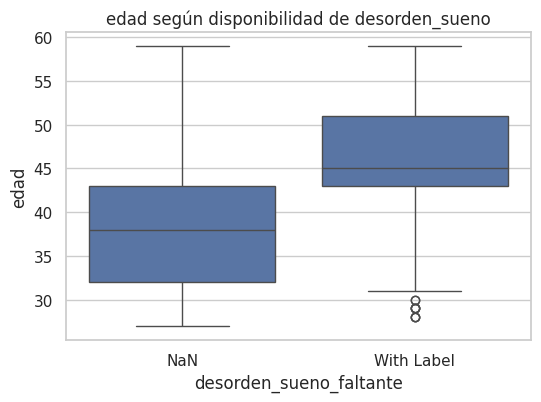

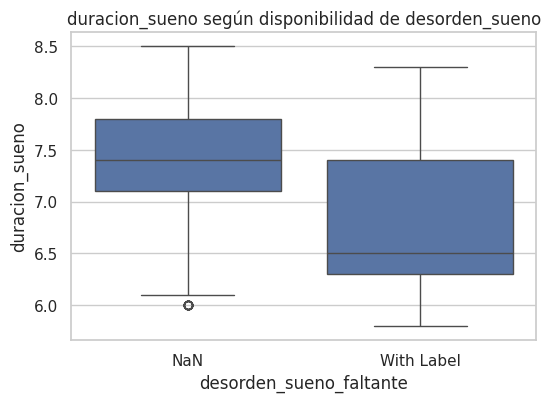

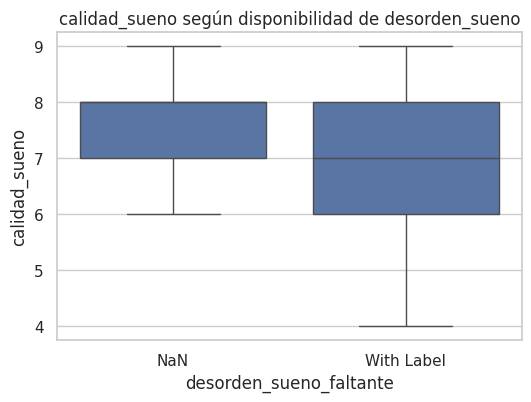

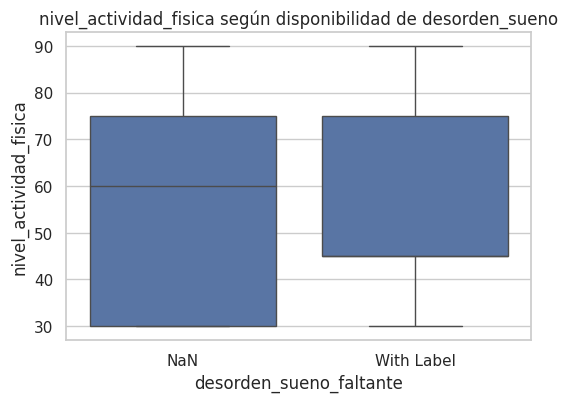

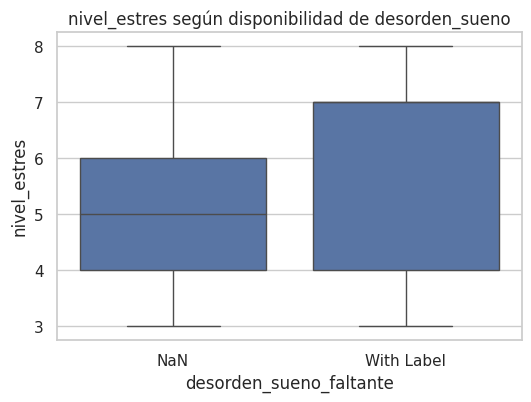

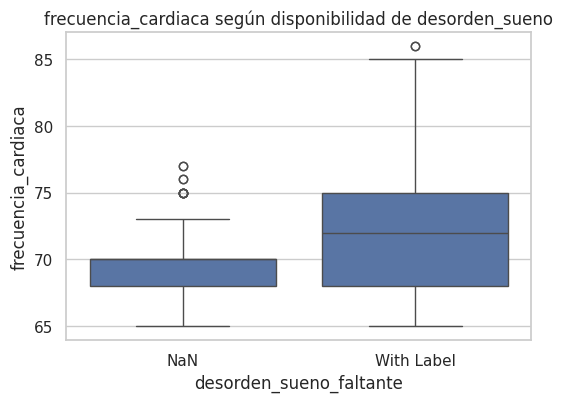

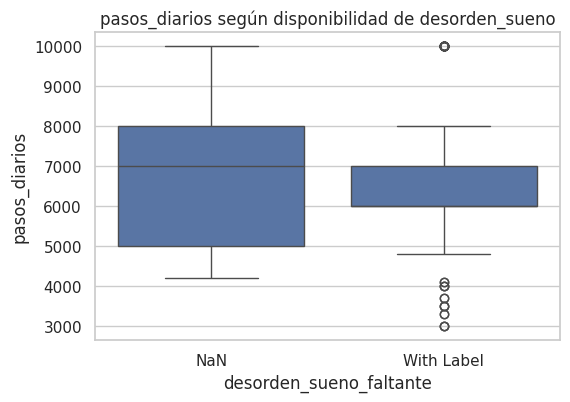

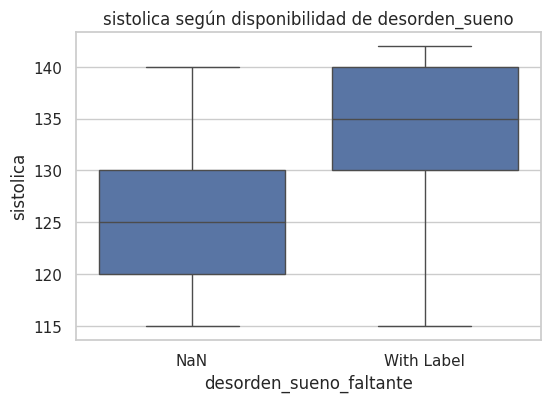

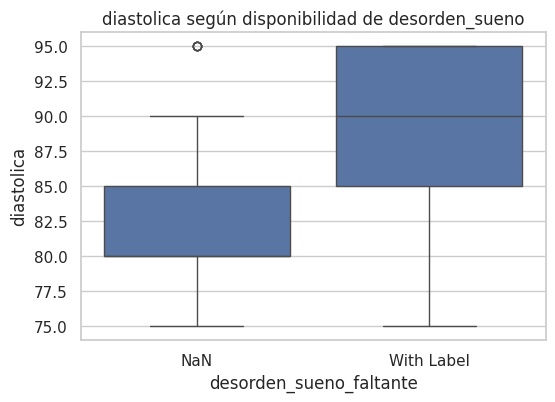

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Opciones de visualización
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# 3. Conteo de valores en desorden_sueno (incluyendo NaN)

print(">>> Conteo absoluto:")
print(df["desorden_sueno"].value_counts(dropna=False))

print("\n>>> Conteo porcentual:")
print(df["desorden_sueno"].value_counts(dropna=False, normalize=True) * 100)

# 4. Porcentaje de NaN
nan_percent = df["desorden_sueno"].isna().mean() * 100
print(f"\n>>> Porcentaje de NaN en desorden_sueno: {nan_percent:.2f}%")

# 5. Crear columna binaria: tiene etiqueta o no
df["desorden_sueno_faltante"] = df["desorden_sueno"].isna().map({True:"NaN", False:"With Label"})

# 6. Comparación de NaN vs otras variables categóricas
categorical_vars = ["genero", "ocupacion", "indice_imc"]

for col in categorical_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue="desorden_sueno_faltante")
    plt.title(f"Distribución de NaN en desorden_sueno según {col}")
    plt.xticks(rotation=45)
    plt.show()

# 7. Comparación de NaN vs variables numéricas
numeric_vars = ["edad", "duracion_sueno", "calidad_sueno",
                "nivel_actividad_fisica", "nivel_estres",
                "frecuencia_cardiaca", "pasos_diarios", "sistolica", "diastolica"]

for col in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="desorden_sueno_faltante", y=col)
    plt.title(f"{col} según disponibilidad de desorden_sueno")
    plt.show()



6. Análisis Predictivo
- Preprocesamiento para Análisis Predictivo: Problemas, Técnicas y Código
- Modelado Predictivo
- Modelo elegido y parámetros
- Entrenamiento y Evaluación
- Resultados

# **7. Conclusiones y Trabajos Futuros**

##Dado que las graficas senalan que la mayoria de las personas con la etiqueta NaN en la columna desorden_sueno se relacionan con personas con habitos saludables como mas horas de sueno, mas pasos por dia, baja presion arterial, bajo nivel de stress, se puede concluir que se puede reetiquetar NaN por personas con bajo riesgo, en lugar de datos nulos.

##En el analisis predictivo se evaluara la opcion de considerar los valores NaN como aquellas personas que no tienen ningun desorden de sueno y ademas se hara de forma adicional la aplicacion de modelados de clasificacion a las personas que si estan en una de las dos clases: insomnia o sleep apena y posteriormente se buscara clasificar dentro de alguna de estas a las personas que en este momento tienen la categoria NaN.

##En este momento se puede observar una dataset desbalanceado en la variable target pero que muestra oportunidades de aprendizaje.

https://github.com/TonyProgramandoAndo/Revision-Proyecto-Sept-09